In [3]:
# change these to try this notebook out
BUCKET = 'cloud-training-demos-ml'
PROJECT = 'cloud-training-demos'
REGION = 'us-central1'

In [4]:
import os
os.environ['BUCKET'] = BUCKET
os.environ['PROJECT'] = PROJECT
os.environ['REGION'] = REGION

In [5]:
%%bash
if ! gsutil ls | grep -q gs://${BUCKET}/; then
  gsutil mb -l ${REGION} gs://${BUCKET}
fi

Creating gs://cloud-training-demos-ml/...
ServiceException: 409 Bucket cloud-training-demos-ml already exists.


# Explore data

In [17]:
import google.datalab.bigquery as bq
import matplotlib.pyplot as plt

In [6]:
# Create SQL query using natality data after the year 2000
query = """
SELECT
  weight_pounds,
  is_male,
  mother_age,
  plurality,
  gestation_weeks,
  FARM_FINGERPRINT(CONCAT(CAST(YEAR AS STRING), CAST(month AS STRING))) AS hashmonth
FROM
  publicdata.samples.natality
WHERE year > 2000
"""

In [7]:
# Call BigQuery and examine in dataframe
df = bq.Query(query + " LIMIT 100").execute().result().to_dataframe()
df.head()

,weight_pounds,is_male,mother_age,plurality,gestation_weeks,hashmonth
0,3.562670,True,25,1,30,-1403073183891835564
1,3.999185,False,30,1,32,-7146494315947640619
2,7.438397,True,13,1,34,-7146494315947640619
3,4.806077,True,19,1,34,8904940584331855459
4,4.812691,True,22,3,34,-2126480030009879160


In [8]:
# Create function that finds the number of records and the average weight for each value of the chosen column
def get_distinct_values(column_name):
  sql = """
SELECT
  {0},
  COUNT(1) AS num_babies,
  AVG(weight_pounds) AS avg_wt
FROM
  publicdata.samples.natality
WHERE
  year > 2000
GROUP BY
  {0}
  """.format(column_name)
  return bq.Query(sql).execute().result().to_dataframe()

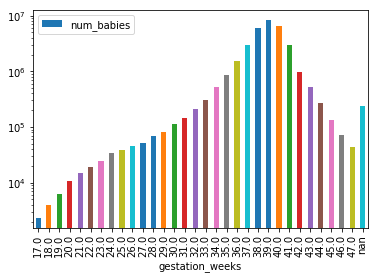

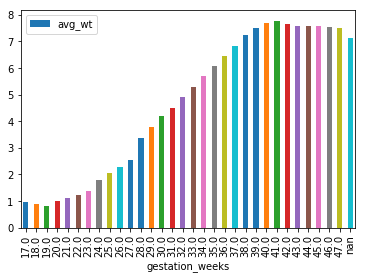

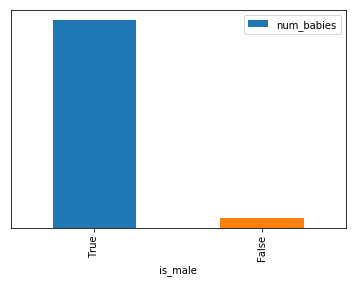

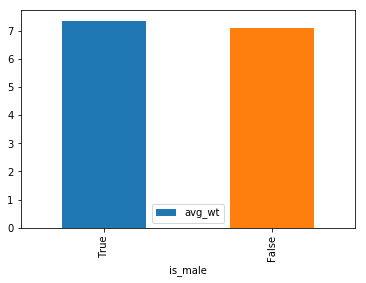

In [18]:
# Bar plot to see is_male with avg_wt linear and num_babies logarithmic
df = get_distinct_values('is_male')
df.plot(x='is_male', y='num_babies', logy=True, kind='bar');
df.plot(x='is_male', y='avg_wt', kind='bar');
plt.show()

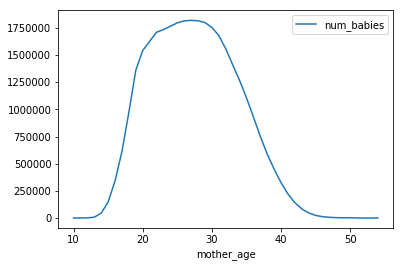

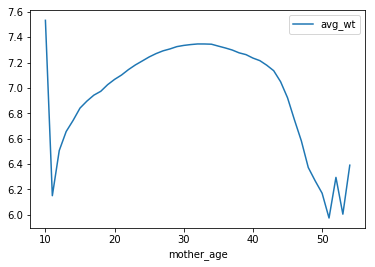

In [19]:
# Line plots to see mother_age with avg_wt linear and num_babies logarithmic
df = get_distinct_values('mother_age')
df = df.sort_values('mother_age')
df.plot(x='mother_age', y='num_babies');
df.plot(x='mother_age', y='avg_wt');
plt.show()

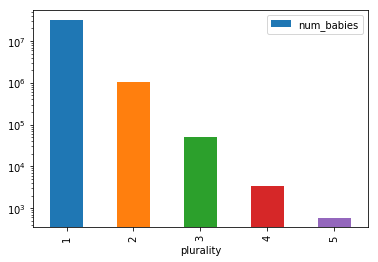

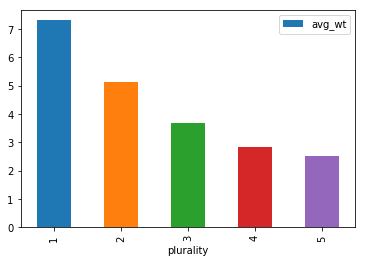

In [20]:
# Bar plot to see plurality(singleton, twins, etc.) with avg_wt linear and num_babies logarithmic
df = get_distinct_values('plurality')
df = df.sort_values('plurality')
df.plot(x='plurality', y='num_babies', logy=True, kind='bar');
df.plot(x='plurality', y='avg_wt', kind='bar');
plt.show()

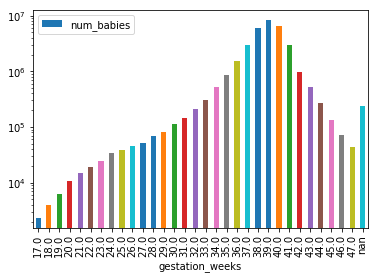

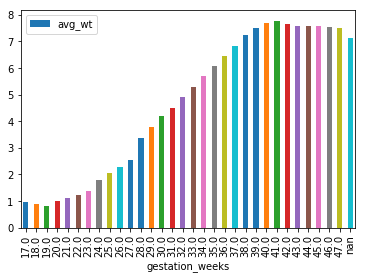

In [21]:
# Bar plot to see gestation_weeks with avg_wt linear and num_babies logarithmic
df = get_distinct_values('gestation_weeks')
df = df.sort_values('gestation_weeks')
df.plot(x='gestation_weeks', y='num_babies', logy=True, kind='bar');
df.plot(x='gestation_weeks', y='avg_wt', kind='bar');
plt.show()